In [3]:
import tensorflow as tf
from tensorflow.keras import datasets
import tensorflow_datasets as tfds

# Regression problem

In [4]:
import numpy as np
X = tf.constant(np.arange(0, 100))
X

<tf.Tensor: shape=(100,), dtype=int32, numpy=
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])>

In [5]:
y = tf.constant(np.arange(0, 100)+10)
y

<tf.Tensor: shape=(100,), dtype=int32, numpy=
array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109])>

In [6]:
split_size = int(0.8 * len(X))
X_train = X[:split_size]
y_train = y[:split_size]
X_test = X[split_size:]
y_test = y[split_size:]
len(X_train), len(X_test), len(y_train), len(y_test)

(80, 20, 80, 20)

In [10]:
from tensorflow.keras import layers
# Create a model
model_1 = tf.keras.Sequential([
  layers.Dense(100),
  layers.Dense(10),
  layers.Dense(1)
], name="model_1_dense")
# Compile the model
model_1.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)
# Fit the model
model_1_history = model_1.fit(tf.expand_dims(X_train,axis=-1),
                              y_train,
                              validation_data=(tf.expand_dims(X_test,axis=-1), y_test),
                              epochs=10)

Epoch 1/10
3/3 [==============================] - 0s 52ms/step - loss: 65.9328 - mae: 65.9328 - val_loss: 123.8437 - val_mae: 123.8437
Epoch 2/10
3/3 [==============================] - 0s 11ms/step - loss: 57.9076 - mae: 57.9076 - val_loss: 106.1943 - val_mae: 106.1943
Epoch 3/10
3/3 [==============================] - 0s 10ms/step - loss: 50.2764 - mae: 50.2764 - val_loss: 88.6133 - val_mae: 88.6133
Epoch 4/10
3/3 [==============================] - 0s 10ms/step - loss: 42.6714 - mae: 42.6714 - val_loss: 71.0806 - val_mae: 71.0806
Epoch 5/10
3/3 [==============================] - 0s 10ms/step - loss: 34.6504 - mae: 34.6504 - val_loss: 53.5644 - val_mae: 53.5644
Epoch 6/10
3/3 [==============================] - 0s 12ms/step - loss: 26.9669 - mae: 26.9669 - val_loss: 35.7805 - val_mae: 35.7805
Epoch 7/10
3/3 [==============================] - 0s 11ms/step - loss: 18.9770 - mae: 18.9770 - val_loss: 17.7394 - val_mae: 17.7394
Epoch 8/10
3/3 [==============================] - 0s 10ms/step - 

In [11]:
model_1.evaluate(X_test,y_test)

1/1 [==============================] - 0s 63ms/step - loss: 25.3154 - mae: 25.3154


[25.3154296875, 25.3154296875]

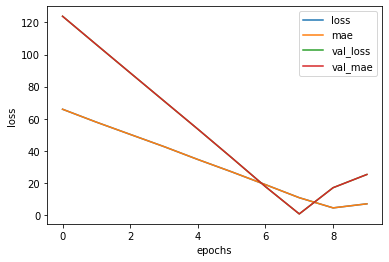

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(model_1_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [13]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               200       
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


In [10]:
y_pred=model_1.predict(X_test)

In [11]:
y_test.shape,y_pred.shape

(TensorShape([20]), (20, 1))

In [12]:
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=y_pred):
  """
  Plot training data,test data and compares the predictions to ground truth 
  """
  plt.figure(figsize=(10,7))
  # plot data training in blue
  plt.scatter(train_data, train_label, c="b", label="Training")
  # plot data testing in green
  plt.scatter(test_data, test_label, c="g", label="Testing")
  # plt predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  plt.legend()

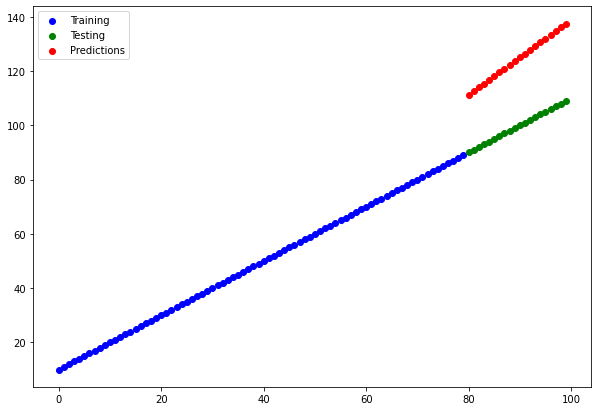

In [13]:
plot_predictions()

# Classification Problems
# Binary Classification

In [14]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000
# create circles
X, y = make_circles(n_samples=n_samples,
                    shuffle=True,
                    noise=0.03,
                    random_state=42)

In [15]:
X.shape, y.shape

((1000, 2), (1000,))

In [16]:
df = pd.DataFrame({"X1":X[:,0],
                  "X2":X[:,1],
                  "y": y})
df.head()

,X1,X2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [17]:
df['X1']=df['X1'].astype(dtype='float32')
df['X2']=df['X2'].astype(dtype='float32')

In [18]:
X[:,0].shape, X[:,1].shape

((1000,), (1000,))

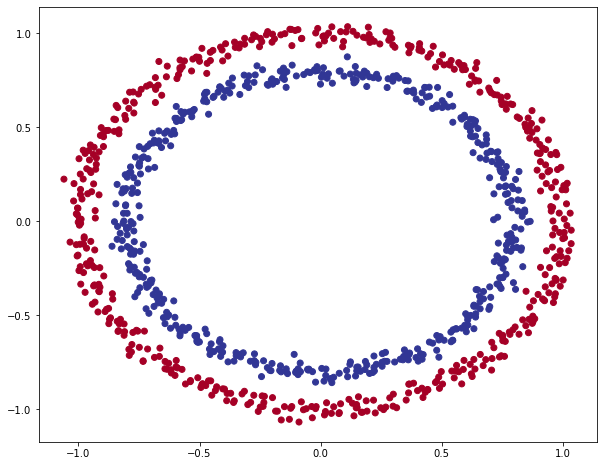

In [19]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [20]:
X=df.drop(['y'],axis=1)
y=df.y

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

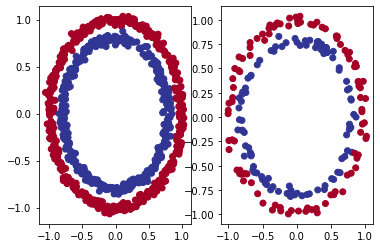

In [22]:
plt.subplot(1,2, 1)
plt.scatter(X_train.X1, X_train.X2, c=y_train, cmap=plt.cm.RdYlBu)

plt.subplot(1,2 ,2)
plt.scatter(X_test.X1, X_test.X2, c=y_test, cmap=plt.cm.RdYlBu)

In [23]:
# create model
model_2 = tf.keras.Sequential([
  layers.Dense(100, activation="relu"),
  layers.Dense(100, activation="relu"),
  layers.Dense(1, activation="sigmoid")
],name='binary_class_model')
# compile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
# fit the model
model_2_history = model_2.fit(X_train,
                              y_train,
                              validation_data=(X_test, y_test),
                              epochs=10)

Epoch 1/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5125 - val_loss: 0.6882 - val_accuracy: 0.5000
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5000 - val_loss: 0.6850 - val_accuracy: 0.5000
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5000 - val_loss: 0.6824 - val_accuracy: 0.5000
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.5000 - val_loss: 0.6753 - val_accuracy: 0.5000
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.5263 - val_loss: 0.6629 - val_accuracy: 0.6050
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6458 - accuracy: 0.7287 - val_loss: 0.6434 - val_accuracy: 0.5500
Epoch 7/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6196 - accuracy: 0.7450 - val_loss: 0.6115 - val_accuracy: 0.7550
Epoch 8/10
25/25 [==

In [24]:
y_pred=model_2.predict(X_test)
model_2.evaluate(X_test,y_test)

7/7 [==============================] - 0s 710us/step - loss: 0.4527 - accuracy: 0.9150


[0.45273274183273315, 0.9150000214576721]

In [25]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max()+0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max()+0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # Create X value (we're going to predictions on these):
  # ravel() is flatten an array
  # np.c_ is concat array along the second axis
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d array together

  # make predictions
  y_pred = model.predict(x_in)

  # check for multi-class:
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classificatioon")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0],X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classificatioon


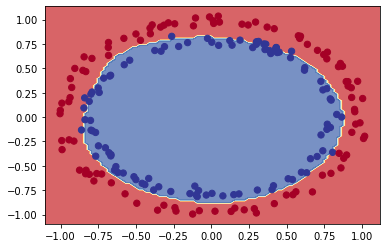

In [26]:
plot_decision_boundary(model_2, X_test.values, y_test)

##### Multiclass classification

In [27]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

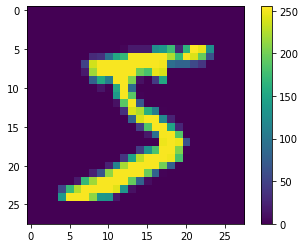

In [28]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [29]:
img = X_train[0]
tf.reduce_max(img), tf.reduce_min(img)

(<tf.Tensor: shape=(), dtype=uint8, numpy=255>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=0>)

In [30]:
label = y_train[0]
label

5

### Normalize data

In [31]:
X_train, X_test = X_train/255., X_test/255.
tf.reduce_max(X_train), tf.reduce_min(X_train)

(<tf.Tensor: shape=(), dtype=float64, numpy=1.0>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.0>)

In [32]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [33]:
y_train.shape, y_test.shape

((60000,), (10000,))

# Dense model multiclassification

In [34]:
from tensorflow.keras import layers
# Create a model
model_0 = tf.keras.Sequential([
  layers.Flatten(),
  layers.Dense(100, activation="relu"),
  layers.Dense(10, activation="softmax")
])
# Compile the model
model_0.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
# Fit the model
model_0_history = model_0.fit(x=X_train, 
                              y=y_train,
                              validation_data=(X_test, y_test),
                              epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2742 - accuracy: 0.9220 - val_loss: 0.1468 - val_accuracy: 0.9566
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1258 - accuracy: 0.9627 - val_loss: 0.1068 - val_accuracy: 0.9680
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0884 - accuracy: 0.9734 - val_loss: 0.0877 - val_accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0668 - accuracy: 0.9801 - val_loss: 0.0864 - val_accuracy: 0.9732
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0520 - accuracy: 0.9843 - val_loss: 0.0838 - val_accuracy: 0.9738
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0420 - accuracy: 0.9866 - val_loss: 0.0789 - val_accuracy: 0.9759
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0335 - accuracy: 0.9900 - val_loss: 0.0941 - val_accuracy:

In [35]:
model_0.evaluate(X_test, y_test)

313/313 [==============================] - 0s 946us/step - loss: 0.0797 - accuracy: 0.9772: 0s - loss: 0.1080 - accuracy: 


[0.07966041564941406, 0.9771999716758728]

In [36]:
from sklearn.metrics import accuracy_score
model_0_pred_prob = model_0.predict(X_test)
model_0_pred=tf.argmax(model_0_pred_prob, axis=1)
model_0_accuracy = accuracy_score(y_true=y_test, y_pred=model_0_pred)
model_0_accuracy

0.9772

In [37]:
from sklearn.metrics import precision_recall_fscore_support

model_0_precision, model_0_recall, model_0_f1, _ = precision_recall_fscore_support(y_true=y_test,
                                                                                y_pred=model_0_pred,
                                                                                average="weighted")
model_0_precision, model_0_recall, model_0_f1

(0.9772497630007397, 0.9772, 0.9772075157153158)

In [38]:
model_0_results = {
    "accuracy": model_0_accuracy,
    "precision": model_0_precision,
    "recall": model_0_recall,
    "f1": model_0_f1
}

model_0_results

{'accuracy': 0.9772,
 'precision': 0.9772497630007397,
 'recall': 0.9772,
 'f1': 0.9772075157153158}

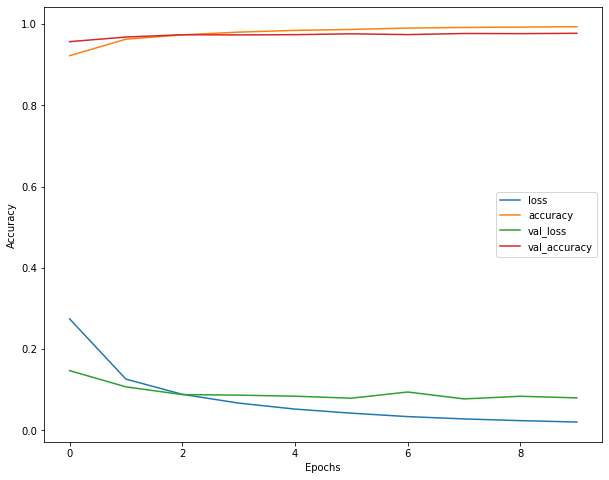

In [39]:
import pandas as pd
# plt.figure()
pd.DataFrame(model_0_history.history).plot(figsize=(10,8))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# image classification

In [40]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [41]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

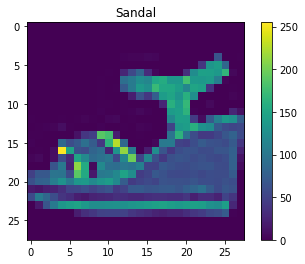

In [42]:
import random 
random_num = random.randint(0,len(X_train)-1)
img = X_train[random_num]
label = y_train[random_num]
plt.imshow(img)
plt.title(class_names[label])
plt.colorbar()
plt.show()

###### Preprocess data

In [43]:
len(class_names)

10

In [44]:
X_train = X_train/255.
y_train = tf.one_hot(y_train, depth=len(class_names))

X_test = X_test/255.
y_test =tf.one_hot(y_test, depth=len(class_names))

tf.reduce_max(X_train), tf.reduce_min(X_train), y_train[0]

(<tf.Tensor: shape=(), dtype=float64, numpy=1.0>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.0>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)>)

# Build and train Conv2D model

In [26]:
def create_checkpoint_callback(model_name):
  return tf.keras.callbacks.ModelCheckpoint(filepath=f"{model_name}/checkpoint.ckpt",
                                                          #  monitor="val_accuracy",
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           save_freq="epoch")

In [46]:
from tensorflow.keras import layers

# Build a model
inputs = layers.Input(shape=(28, 28,1), name="input_layer")

x = layers.Conv2D(filters=32,
                 kernel_size=3,
                 padding="same",
                  activation="relu")(inputs)
x = layers.Conv2D(filters=32,
                  kernel_size=3,
                  padding="same",
                  activation="relu")(x)
x = layers.MaxPooling2D()(x)

x = layers.Flatten()(x)

x = layers.Dense(100, activation='relu')(x)
x = layers.Dense(10, activation='relu')(x)

outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_3 = tf.keras.Model(inputs, outputs, name="model_3_conv2d")

# Compile the model
model_3.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
# Fit the model
model_3_history = model_3.fit(X_train,
                              y_train,
                              validation_data=(X_test, y_test),
                              epochs=10,
                              callbacks=[create_checkpoint_callback(model_3.name)])

Epoch 1/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.5572 - accuracy: 0.8122 - val_loss: 0.3470 - val_accuracy: 0.8782
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2752 - accuracy: 0.9007 - val_loss: 0.2725 - val_accuracy: 0.8995
Epoch 3/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2213 - accuracy: 0.9187 - val_loss: 0.2534 - val_accuracy: 0.9086
Epoch 4/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1821 - accuracy: 0.9325 - val_loss: 0.2495 - val_accuracy: 0.9100
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1496 - accuracy: 0.9450 - val_loss: 0.2417 - val_accuracy: 0.9173
Epoch 6/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1201 - accuracy: 0.9557 - val_loss: 0.2438 - val_accuracy: 0.9188
Epoch 7/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0962 - accuracy: 0.9638 - val_loss: 0.2696 -

In [ ]:
import zipfile
import wget
url = 'https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip'
myfile = wget.download(url)

In [ ]:
zip_ref = zipfile.ZipFile(myfile)
zip_ref.extractall()
zip_ref.close()

In [14]:
import os
for dir_path, dir_names, file_names in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dir_names)} directories and {len(file_names)} in {dir_path}")

There are 2 directories and 0 in 10_food_classes_10_percent
There are 10 directories and 0 in 10_food_classes_10_percent\test
There are 0 directories and 250 in 10_food_classes_10_percent\test\chicken_curry
There are 0 directories and 250 in 10_food_classes_10_percent\test\chicken_wings
There are 0 directories and 250 in 10_food_classes_10_percent\test\fried_rice
There are 0 directories and 250 in 10_food_classes_10_percent\test\grilled_salmon
There are 0 directories and 250 in 10_food_classes_10_percent\test\hamburger
There are 0 directories and 250 in 10_food_classes_10_percent\test\ice_cream
There are 0 directories and 250 in 10_food_classes_10_percent\test\pizza
There are 0 directories and 250 in 10_food_classes_10_percent\test\ramen
There are 0 directories and 250 in 10_food_classes_10_percent\test\steak
There are 0 directories and 250 in 10_food_classes_10_percent\test\sushi
There are 10 directories and 0 in 10_food_classes_10_percent\train
There are 0 directories and 75 in 10_fo

In [15]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [16]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = sorted([item.name for item in data_dir.glob("*")])
print(class_names)

['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']


In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  # Set the target directory
  target_folder = os.path.join(target_dir, target_class)

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  # Read in the image 
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape {img.shape}")
  return img

['277516.jpg']
Image shape (512, 382, 3)


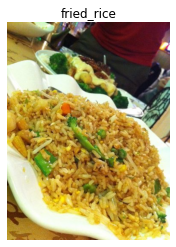

In [18]:
random_class = random.choice(class_names)
random_img = view_random_image(train_dir, random_class)

In [19]:
IMG_SIZE=(224,224)

In [20]:
IMG_SIZE+(3,)

(224, 224, 3)

In [21]:
IMG_SHAPE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 5

# Specify the train and the test directories
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

print("Training image:")
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                              image_size=IMG_SIZE,
                                              batch_size=BATCH_SIZE,
                                              label_mode="categorical")
print("Testing image:")
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                            image_size=IMG_SIZE,
                                            batch_size=BATCH_SIZE,
                                            label_mode="categorical")

Training image:
Found 750 files belonging to 10 classes.
Testing image:
Found 2500 files belonging to 10 classes.


In [56]:
inputs = layers.Input(shape=(IMG_SIZE+(3,)), name="input_layer")

x = layers.experimental.preprocessing.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=10,
                  kernel_size=3,
                  activation="relu")(x)
x = layers.Conv2D(filters=10,
                  kernel_size=3,
                  activation="relu")(x)
x = layers.MaxPool2D()(x)

x = layers.Flatten()(x)

outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_4 = tf.keras.Model(inputs, outputs, name="model_4_Conv2D")

# Compile the model
model_4.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
model_4_history = model_4.fit(train_data_10_percent,
                              validation_data=test_data_10_percent,
                              epochs=5,
                              callbacks=[create_checkpoint_callback(model_4.name)])


Epoch 1/5
24/24 [==============================] - 29s 1s/step - loss: 5.3116 - accuracy: 0.1067 - val_loss: 2.2950 - val_accuracy: 0.1100
Epoch 2/5
24/24 [==============================] - 29s 1s/step - loss: 2.0779 - accuracy: 0.3587 - val_loss: 2.2512 - val_accuracy: 0.1556
Epoch 3/5
24/24 [==============================] - 35s 1s/step - loss: 1.4823 - accuracy: 0.6520 - val_loss: 2.2519 - val_accuracy: 0.1856
Epoch 4/5
24/24 [==============================] - 34s 1s/step - loss: 0.6885 - accuracy: 0.8787 - val_loss: 2.4266 - val_accuracy: 0.1884
Epoch 5/5
24/24 [==============================] - 31s 1s/step - loss: 0.2372 - accuracy: 0.9747 - val_loss: 2.6883 - val_accuracy: 0.1680


In [57]:
model_4.evaluate(test_data_10_percent)

79/79 [==============================] - 16s 200ms/step - loss: 2.6883 - accuracy: 0.1680


[2.688333749771118, 0.1679999977350235]

<AxesSubplot:>

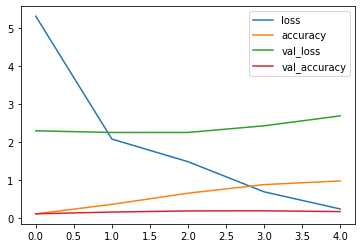

In [58]:
pd.DataFrame(model_4_history.history).plot()

In [22]:
# Create augmented data generator instance
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

# Prepare dataset
train_datagen = ImageDataGenerator(rescale=1./255,
                                rotation_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_ds = train_datagen.flow_from_directory(train_dir,
                                             target_size=IMG_SIZE,
                                             seed=42,
                                             shuffle=False)

test_ds = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             seed=42,
                                             shuffle=False)

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [60]:
inputs = layers.Input(shape=(IMG_SIZE+(3,)), name="input_layer")

x = layers.Conv2D(filters=10,
                  kernel_size=3,
                  activation="relu")(inputs)
x = layers.Conv2D(filters=10,
                  kernel_size=3,
                  activation="relu")(x)
x = layers.MaxPool2D()(x)

x = layers.Conv2D(filters=10,
                  kernel_size=3,
                  activation="relu")(x)
x = layers.Conv2D(filters=10,
                  kernel_size=3,
                  activation="relu")(x)
x = layers.MaxPool2D()(x)

x = layers.Flatten()(x)

outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv2D_data_aug")

# Compile the model
model_5.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
model_5_history = model_5.fit(train_ds,
                              validation_data=test_ds,
                              epochs=10,
                              callbacks=[create_checkpoint_callback(model_5.name)])

Epoch 1/10
24/24 [==============================] - 38s 2s/step - loss: 2.4248 - accuracy: 0.0133 - val_loss: 2.3033 - val_accuracy: 0.1136
Epoch 2/10
24/24 [==============================] - 39s 2s/step - loss: 2.3040 - accuracy: 0.0613 - val_loss: 2.3028 - val_accuracy: 0.1060
Epoch 3/10
24/24 [==============================] - 46s 2s/step - loss: 2.3036 - accuracy: 0.0333 - val_loss: 2.3028 - val_accuracy: 0.0896
Epoch 4/10
24/24 [==============================] - 37s 2s/step - loss: 2.3034 - accuracy: 0.0680 - val_loss: 2.3027 - val_accuracy: 0.0868
Epoch 5/10
24/24 [==============================] - 43s 2s/step - loss: 2.3034 - accuracy: 0.0667 - val_loss: 2.3027 - val_accuracy: 0.0920
Epoch 6/10
24/24 [==============================] - 41s 2s/step - loss: 2.3034 - accuracy: 0.0947 - val_loss: 2.3027 - val_accuracy: 0.0968
Epoch 7/10
24/24 [==============================] - 43s 2s/step - loss: 2.3031 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.0992
Epoch 8/10
24/24 [==

In [61]:
model_5.evaluate(test_ds)

79/79 [==============================] - 22s 280ms/step - loss: 2.3026 - accuracy: 0.1000


[2.3026084899902344, 0.10000000149011612]

# Transfer learning
using EfficientNetB0-V2

In [23]:
IMG_SHAPE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 5

# Specify the train and the test directories
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

print("Training image:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                              target_size=IMG_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")
print("Testing image:")
test_data_10_percent = test_datagen.flow_from_directory(test_dir,
                                            target_size=IMG_SHAPE,
                                            batch_size=BATCH_SIZE,
                                            class_mode="categorical")

Training image:
Found 750 images belonging to 10 classes.
Testing image:
Found 2500 images belonging to 10 classes.


In [63]:
base_model = tf.keras.applications.EfficientNetB0(include_top=True,input_shape=IMG_SHAPE+(3,))
base_model.trainable = False
model_6_v2 = tf.keras.Sequential([
    base_model, # use the feature extraction layer as the base
    layers.Dense(len(class_names), activation='softmax', name='output_layer') # create our own output layer      
  ])
model_6_v2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(), # use Adam with default settings
              metrics=["accuracy"])

In [64]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
_____________________________________________________________________________________

In [65]:
model_6_v2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 1000)              5330571   
_________________________________________________________________
output_layer (Dense)         (None, 10)                10010     
Total params: 5,340,581
Trainable params: 10,010
Non-trainable params: 5,330,571
_________________________________________________________________


In [66]:
model_6_v2_history = model_6_v2.fit(train_data_10_percent,
                              validation_data=test_data_10_percent,
                              epochs=5,
                              callbacks=[create_checkpoint_callback(model_6_v2.name)])

Epoch 1/5
24/24 [==============================] - 108s 5s/step - loss: 2.3031 - accuracy: 0.0867 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/5
24/24 [==============================] - 118s 5s/step - loss: 2.3028 - accuracy: 0.0907 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/5
24/24 [==============================] - 116s 5s/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/5
24/24 [==============================] - 118s 5s/step - loss: 2.3030 - accuracy: 0.0773 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/5
24/24 [==============================] - 115s 5s/step - loss: 2.3028 - accuracy: 0.0867 - val_loss: 2.3026 - val_accuracy: 0.1000


In [31]:
import tensorflow_hub as hub
efficientnetb0_v2_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"
# efficientnetb0_v1_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"
feature_extracter_layer = hub.KerasLayer(efficientnetb0_v2_url,
                                         trainable=False,
                                         name="feature_extractor_layer")

In [32]:
model_6_v2 = tf.keras.Sequential([
      feature_extracter_layer,
      layers.Dense(len(class_names), activation="softmax", name="output_layer")
])

model_6_v2.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_6_v2_history = model_6_v2.fit(train_data_10_percent,
                              validation_data=test_data_10_percent,
                              epochs=5,
                              callbacks=[create_checkpoint_callback(model_6_v2.name)])

Epoch 1/5
24/24 [==============================] - 82s 3s/step - loss: 1.9993 - accuracy: 0.3133 - val_loss: 1.5536 - val_accuracy: 0.5944
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3383 - accuracy: 0.6800

KeyboardInterrupt: 

In [30]:
inputs = layers.Input(shape=(IMG_SIZE+(3,)), name="input_layer")

x = layers.Rescaling(1./255)(inputs)

x = feature_extracter_layer(x)

outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_7_V2 = tf.keras.Model(inputs, outputs, name="model_7_V2_transfer_learning_feature_extraction")

# Compile the model
model_7_V2.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
model_7_V2_history = model_7_V2.fit(train_data_10_percent,
                              validation_data=test_data_10_percent,
                              epochs=5,
                              callbacks=[create_checkpoint_callback(model_7_V2.name)])

Epoch 1/5
24/24 [==============================] - 81s 3s/step - loss: 2.3169 - accuracy: 0.0800 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 2.3114 - accuracy: 0.0840

KeyboardInterrupt: 

# Natural Languare Processing
    Binary Classification
    In this problem we'll use the Twitter disaster datasets

In [35]:
import wget
url = 'https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip'
myfile = wget.download(url)

100% [............................................................................] 607343 / 607343

In [37]:
import zipfile
zip_ref = zipfile.ZipFile(myfile)
zip_ref.extractall()
zip_ref.close()

In [38]:
import pandas as pd

raw_df = pd.read_csv("train.csv")

raw_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [39]:
raw_df["keyword"].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [40]:
raw_df["location"].value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

In [42]:
train_df_shuffled = raw_df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [43]:
train_df_shuffled=train_df_shuffled.drop(['id','keyword','location'],axis=1)
train_df_shuffled

,text,target
2644,So you have a new weapon that can cause un-ima...,1
2227,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,Aftershock back to school kick off was great. ...,0
6845,in response to trauma Children of Addicts deve...,0
...,...,...
5226,@Eganator2000 There aren't many Obliteration s...,0
5390,just had a panic attack bc I don't have enough...,0
860,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,Officials say a quarantine is in place at an A...,1


<AxesSubplot:>

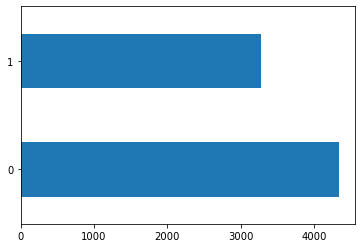

In [44]:
train_df_shuffled["target"].value_counts().plot(kind="barh")

In [46]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.2,
                                                                            random_state=42)

len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(6090, 1523, 6090, 1523)

In [47]:
train_sentences.shape

(6090,)

In [49]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# Note: in TensorFlow 2.6+, you no longer need "layers.experimental.preprocessing"
# you can use: "tf.keras.layers.TextVectorization", see https://github.com/tensorflow/tensorflow/releases/tag/v2.6.0 for more

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [50]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [51]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace",
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [52]:
text_vectorizer.adapt(train_sentences)

In [53]:
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
she keep it wet like tsunami.      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 208,  397,   15, 2410,   25,  517,    0,    0,    0,    0,    0,
           0,    0,    0,    0]], dtype=int64)>

In [54]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['minded', 'mindblowing', 'milne', 'milledgeville', 'millcityio']


In [55]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1") 

embedding

In [56]:
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
Jays rocking #MLB @JoeyBats19 just bombed one out of Rogers Centre. Play-offs r ahead for The #BlueJays - Bell Moseby and Barfield r back!      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.00477182,  0.03976698,  0.01711961, ..., -0.02275485,
          0.01055753, -0.03317962],
        [-0.01484648,  0.04340242, -0.03687606, ...,  0.03987407,
          0.00476655, -0.04437194],
        [-0.00860314,  0.02833365, -0.00076376, ...,  0.01373389,
          0.00063994,  0.03162192],
        ...,
        [ 0.04157963, -0.04516028,  0.04590489, ..., -0.00420184,
          0.02172515, -0.03236417],
        [-0.02993214,  0.01396969,  0.03798832, ...,  0.0009527 ,
          0.00238551,  0.02462022],
        [-0.03508195,  0.01448471,  0.00513798, ...,  0.04485155,
          0.03976364, -0.03543619]]], dtype=float32)>

In [57]:
inputs = layers.Input(shape=(1,), dtype=tf.string, name="input_layer")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_8 = tf.keras.Model(inputs, outputs, name="model_8_LSTM")
# Compile the model
model_8.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
# Fit the model
model_8_history = model_8.fit(train_sentences,
                              train_labels,
                              validation_data=(val_sentences, val_labels),
                              epochs=5,
                              callbacks=[create_checkpoint_callback(model_8.name)])

Epoch 1/5
191/191 [==============================] - 6s 21ms/step - loss: 0.5087 - accuracy: 0.7479 - val_loss: 0.4569 - val_accuracy: 0.7892
Epoch 2/5
191/191 [==============================] - 4s 19ms/step - loss: 0.3081 - accuracy: 0.8759 - val_loss: 0.5074 - val_accuracy: 0.7814
Epoch 3/5
191/191 [==============================] - 4s 19ms/step - loss: 0.2091 - accuracy: 0.9240 - val_loss: 0.6027 - val_accuracy: 0.7695
Epoch 4/5
191/191 [==============================] - 4s 19ms/step - loss: 0.1432 - accuracy: 0.9498 - val_loss: 0.8004 - val_accuracy: 0.7446
Epoch 5/5
191/191 [==============================] - 4s 20ms/step - loss: 0.0989 - accuracy: 0.9634 - val_loss: 0.8537 - val_accuracy: 0.7814


# NlP multi

In [97]:
raw_df = pd.read_json("News_Category_Dataset_v2.json", lines=True)
# raw_df.to_csv("News_Category_Dataset.csv")
raw_df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [98]:
raw_df.drop(["authors", "link", "date"], axis=1, inplace=True)

In [99]:
class_names = raw_df["category"].unique()
class_names

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

In [100]:
raw_df["category"] = raw_df["category"].map(lambda x: "WORLDPOST" if x=="THE WORLDPOST" else x)

In [101]:
raw_df["text"] = raw_df["headline"] + " " + raw_df["short_description"]

In [102]:
raw_df["text"][0]

'There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV She left her husband. He killed their children. Just another day in America.'

In [103]:
import regex as re
def clean_text(text):
  text = re.sub(r'[^\w\s]','',text)
  return text

In [104]:
import random 

random_int = random.randint(0, len(raw_df)-1)
random_text = raw_df["text"][random_int]
print(f"Text:{random_text}\n Removed puntuation: {clean_text(random_text)}")

Text:U.S. Distaste For Turkish Leader Erdogan May Have Reached 'Tipping Point' “If Erdogan is investing in the Trump administration, I can say that he will be disappointed," Turkish opposition leader Hişyar Özsoy said.
 Removed puntuation: US Distaste For Turkish Leader Erdogan May Have Reached Tipping Point If Erdogan is investing in the Trump administration I can say that he will be disappointed Turkish opposition leader Hişyar Özsoy said


In [105]:
raw_df["text"] = raw_df["text"].map(clean_text)
raw_df["text"] = raw_df["text"].str.lower()
raw_df["text"].head()

0    there were 2 mass shootings in texas last week...
1    will smith joins diplo and nicky jam for the 2...
2    hugh grant marries for the first time at age 5...
3    jim carrey blasts castrato adam schiff and dem...
4    julianna margulies uses donald trump poop bags...
Name: text, dtype: object

In [106]:
# one hot encode labels
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
label = one_hot_encoder.fit_transform(raw_df["category"].to_numpy().reshape(-1,1))

# raw_df["label"] = label
class_names = np.array(one_hot_encoder.categories_, dtype="str")[0]
class_names

array(['ARTS', 'ARTS & CULTURE', 'BLACK VOICES', 'BUSINESS', 'COLLEGE',
       'COMEDY', 'CRIME', 'CULTURE & ARTS', 'DIVORCE', 'EDUCATION',
       'ENTERTAINMENT', 'ENVIRONMENT', 'FIFTY', 'FOOD & DRINK',
       'GOOD NEWS', 'GREEN', 'HEALTHY LIVING', 'HOME & LIVING', 'IMPACT',
       'LATINO VOICES', 'MEDIA', 'MONEY', 'PARENTING', 'PARENTS',
       'POLITICS', 'QUEER VOICES', 'RELIGION', 'SCIENCE', 'SPORTS',
       'STYLE', 'STYLE & BEAUTY', 'TASTE', 'TECH', 'TRAVEL', 'WEDDINGS',
       'WEIRD NEWS', 'WELLNESS', 'WOMEN', 'WORLD NEWS', 'WORLDPOST'],
      dtype='<U14')

In [107]:
sentences = raw_df["text"]
label = one_hot_encoder.fit_transform(raw_df["category"].to_numpy().reshape(-1,1))

In [108]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(sentences.to_numpy(),
                                                                              label,
                                                                              test_size=0.2)

len(train_sentences), len(test_sentences), len(train_labels), len(test_labels)

(160682, 40171, 160682, 40171)

In [109]:
train_labels.shape

(160682, 40)

<AxesSubplot:ylabel='Frequency'>

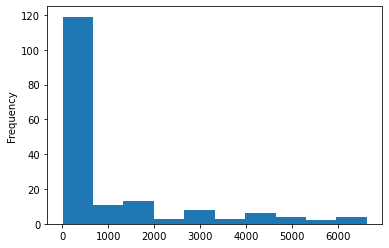

In [110]:
len_train_sentences = [len(sent.split(" ")) for sent in train_sentences]

len_df = pd.DataFrame({"len":len_train_sentences})
len_df.value_counts().plot(kind="hist")

In [111]:
import numpy as np

np.percentile(len_train_sentences, 95)

56.0

In [112]:
vocab = " ".join(train_sentences)
vocab = set(vocab.split(" "))
vocab_len = len(vocab)
vocab_len

102757

In [113]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

29

In [114]:
from tensorflow.keras.layers import TextVectorization, Embedding

MAX_TOKENS = 105000
MAX_LENGTH = 29

text_vectorizer = TextVectorization(max_tokens=MAX_TOKENS,
                                    output_mode="int",
                                    output_sequence_length=MAX_LENGTH)
text_vectorizer.adapt(train_sentences)

text_embedding = Embedding(input_dim=MAX_TOKENS,
                           output_dim=256,
                           input_length=MAX_LENGTH,
                           embeddings_initializer="uniform")

In [115]:
random_sentence = random.choice(train_sentences)
print(f"Original text: \n{random_sentence}\
\n\nEmbedded version:")
# Embed the ramdon sentence (turn it into dense vector of fixed size)
sample_vectorized = text_vectorizer([random_sentence])
sample_embedded = text_embedding(sample_vectorized)
sample_embedded

Original text: 
khloe kardashian takes waist training to the extreme wow

Embedded version:


<tf.Tensor: shape=(1, 29, 256), dtype=float32, numpy=
array([[[ 0.03154316, -0.02763572, -0.0307281 , ...,  0.02261622,
          0.01507845, -0.00240116],
        [ 0.04675725, -0.0059393 ,  0.0352183 , ..., -0.03752282,
          0.01277334, -0.0469928 ],
        [-0.0185409 , -0.02935364, -0.04361112, ...,  0.01178658,
         -0.00881414,  0.02531901],
        ...,
        [ 0.00209948, -0.02022447,  0.04485673, ...,  0.04454786,
         -0.04184499,  0.01310783],
        [ 0.00209948, -0.02022447,  0.04485673, ...,  0.04454786,
         -0.04184499,  0.01310783],
        [ 0.00209948, -0.02022447,  0.04485673, ...,  0.04454786,
         -0.04184499,  0.01310783]]], dtype=float32)>

In [117]:
inputs = layers.Input(shape=(1,), dtype=tf.string, name="input_layer")

x = text_vectorizer(inputs)
x = text_embedding(x)

x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)

outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_9 = tf.keras.Model(inputs, outputs, name="model_8_LSTM_multiclass")

# Compile the model
model_9.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
model_9_history = model_9.fit(train_sentences,
                              train_labels,
                              validation_data=(test_sentences, test_labels),
                              epochs=5)

Epoch 1/5
5022/5022 [==============================] - 1044s 207ms/step - loss: 1.4953 - accuracy: 0.6023 - val_loss: 1.5288 - val_accuracy: 0.5963
Epoch 2/5
  23/5022 [..............................] - ETA: 17:29 - loss: 1.0430 - accuracy: 0.7215

KeyboardInterrupt: 

# Text Generation

In [118]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

1130496/1115394 [==============================] - 0s 0us/step


In [119]:
text = open(path_to_file, "rb").read().decode(encoding="utf8")
# length of text is the number of characters in it
print(f'Length of text: {len(text)} characters')

Length of text: 1115394 characters


In [120]:
print(text[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



In [121]:
vocab = sorted(set(text))
print(f'{len(vocab)} unique characters')

65 unique characters


In [122]:
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab) # vocab has been sorted above so the array positions are the indices.

text_as_int = np.array([char2idx[c] for c in text])

In [123]:
print('{')
for char,_ in zip(char2idx, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))
print('  ...\n}')

{
  '\n':   0,
  ' ' :   1,
  '!' :   2,
  '$' :   3,
  '&' :   4,
  "'" :   5,
  ',' :   6,
  '-' :   7,
  '.' :   8,
  '3' :   9,
  ':' :  10,
  ';' :  11,
  '?' :  12,
  'A' :  13,
  'B' :  14,
  'C' :  15,
  'D' :  16,
  'E' :  17,
  'F' :  18,
  'G' :  19,
  ...
}


In [124]:
# The maximum length sentence we want for a single input in characters
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

for i in char_dataset.take(5):
  print(idx2char[i.numpy()])

F
i
r
s
t


In [125]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

for item in sequences.take(5):
  print(repr(''.join(idx2char[item.numpy()])))

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"
"ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"
'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'


In [136]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

In [146]:
for i in sequences.take(1):
    print(''.join(idx2char[i.numpy()]))

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You 


In [147]:
for input_example, target_example in  dataset.take(1):
  print ('Input data: ', repr(''.join(idx2char[input_example.numpy()])))
  print ('Target data:', repr(''.join(idx2char[target_example.numpy()])))

Input data:  'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'
Target data: 'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '


In [148]:
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

dataset

<BatchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int32, name=None), TensorSpec(shape=(64, 100), dtype=tf.int32, name=None))>

In [149]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [150]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.GRU(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
  ])
  return model

In [ ]:
model = build_model(
  vocab_size = len(vocab),
  embedding_dim=embedding_dim,
  rnn_units=rnn_units,
  batch_size=BATCH_SIZE)

In [154]:
model_10 = tf.keras.Sequential([
     tf.keras.layers.Embedding(vocab_size, embedding_dim,
     batch_input_shape=[BATCH_SIZE, None]),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.LSTM(rnn_units,
     return_sequences=True,
     stateful=True,
     recurrent_initializer="glorot_uniform"),
     tf.keras.layers.Dropout(0.2), 
     tf.keras.layers.LSTM(rnn_units,
     return_sequences=True,
     stateful=True,
     recurrent_initializer="glorot_uniform"),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(vocab_size)
 ],name='text-gen')

In [157]:
model_10.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [158]:
checkpoint_prefix = model_10.name+"/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    monitor="accuracy",
    save_best_only=True,
    save_weights_only=True)

In [159]:
EPOCHS=20
# Train the model
model_10_history = model_10.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/20
172/172 [==============================] - 1486s 9s/step - loss: 2.9060 - accuracy: 0.2230
Epoch 2/20
 52/172 [========>.....................] - ETA: 21:15 - loss: 2.2323 - accuracy: 0.3599

KeyboardInterrupt: 

In [ ]:
def generate_text(model, start_string):
  # Evaluation step (generating text using the learned model)

  # Number of characters to generate
  num_generate = 1000

  # Converting our start string to numbers (vectorizing)
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)

  # Empty string to store our results
  text_generated = []

  # Low temperatures results in more predictable text.
  # Higher temperatures results in more surprising text.
  # Experiment to find the best setting.
  temperature = 1.0

  # Here batch size == 1
  model.reset_states()
  for i in range(num_generate):
      predictions = model(input_eval)
      # remove the batch dimension
      predictions = tf.squeeze(predictions, 0)

      # using a categorical distribution to predict the character returned by the model
      predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

      # We pass the predicted character as the next input to the model
      # along with the previous hidden state
      input_eval = tf.expand_dims([predicted_id], 0)

      text_generated.append(idx2char[predicted_id])

  return (start_string + ''.join(text_generated))

In [ ]:
print(generate_text(model, start_string=u"ROMEO: "))

# Time series

In [165]:
# Import with pandas 
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", 
                 parse_dates=["Date"], 
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [166]:
# Only want closing price for each day 
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


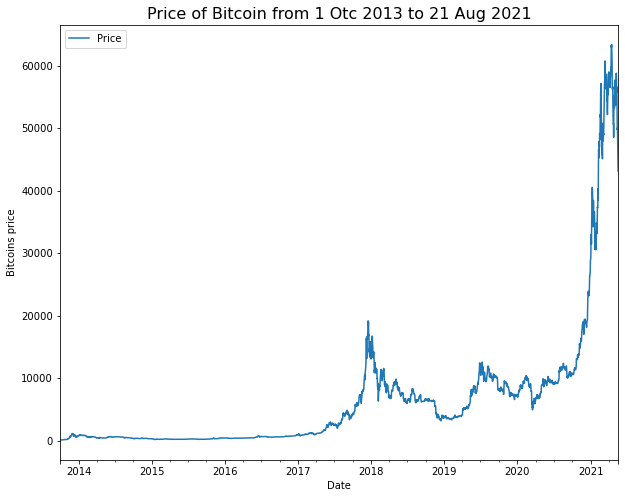

In [167]:
# Plot our data
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize=(10,8))
plt.ylabel("Bitcoins price")
plt.title("Price of Bitcoin from 1 Otc 2013 to 21 Aug 2021", fontsize=16)
plt.show()

In [168]:
# get bitcoins dates and prices array
dates = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

In [231]:
split_time = int(0.8 * len(dates))
time_train = dates[:split_time]
x_train = prices[:split_time]
time_valid = dates[split_time:]
x_valid = prices[split_time:]

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000


In [232]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [233]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [248]:
import numpy as np
import matplotlib.pyplot as plt
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [274]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
test_set=windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model_15 = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.Dense(1),
],name='model_15')

optimizer = tf.keras.optimizers.Adam()
model_15.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model_15.fit(train_set, epochs=100,validation_data=test_set,
            callbacks=[create_checkpoint_callback(model_name=model_15.name)])

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>
(2229,)
Epoch 1/100
9/9 [==============================] - 1s 39ms/step - loss: 2492.1689 - mae: 2492.6689 - val_loss: 13280.5430 - val_mae: 13281.0430
Epoch 2/100
9/9 [==============================] - 0s 30ms/step - loss: 1914.3203 - mae: 1914.8203 - val_loss: 9793.1299 - val_mae: 9793.6299
Epoch 3/100
9/9 [==============================] - 0s 28ms/step - loss: 1306.9696 - mae: 1307.4696 - val_loss: 6139.6709 - val_mae: 6140.1709
Epoch 4/100
9/9 [==============================] - 0s 27ms/step - loss: 647.7028 - mae: 648.2027 - val_loss: 1895.5559 - val_mae: 1896.0558
Epoch 5/100
9/9 [==============================] - 0s 27ms/step - loss: 248.1054 - mae: 248.6032 - val_loss: 1482.8042 - val_mae: 1483.3042
Epoch 6/100
9/9 [==============================] - 0s 28ms/step - loss: 251.2153 - mae: 251.7140 - val_loss: 983.5985 - val_

Epoch 59/100
9/9 [==============================] - 0s 32ms/step - loss: 103.8680 - mae: 104.3562 - val_loss: 521.1584 - val_mae: 521.6559
Epoch 60/100
9/9 [==============================] - 0s 36ms/step - loss: 103.8437 - mae: 104.3312 - val_loss: 520.1679 - val_mae: 520.6671
Epoch 61/100
9/9 [==============================] - 0s 34ms/step - loss: 103.9510 - mae: 104.4394 - val_loss: 520.0585 - val_mae: 520.5577
Epoch 62/100
9/9 [==============================] - 0s 31ms/step - loss: 104.1242 - mae: 104.6118 - val_loss: 521.4886 - val_mae: 521.9873
Epoch 63/100
9/9 [==============================] - 0s 31ms/step - loss: 103.9009 - mae: 104.3888 - val_loss: 520.4276 - val_mae: 520.9272
Epoch 64/100
9/9 [==============================] - 0s 32ms/step - loss: 103.8405 - mae: 104.3281 - val_loss: 520.1365 - val_mae: 520.6359
Epoch 65/100
9/9 [==============================] - 0s 33ms/step - loss: 103.7479 - mae: 104.2359 - val_loss: 520.5934 - val_mae: 521.0927
Epoch 66/100
9/9 [=========

In [275]:
min(history.history['val_loss'])

518.9202270507812

In [276]:
rnn_forecast = model_forecast(model_15, prices[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

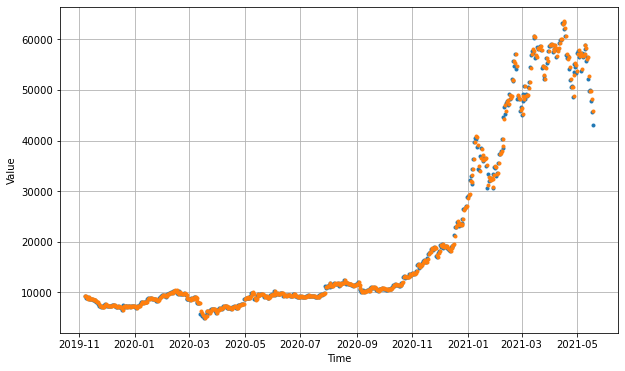

In [277]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid,format='.')
plot_series(time_valid, rnn_forecast,format='.')

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

In [278]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
test_set=windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model_16 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128,activation="relu"),
  tf.keras.layers.Dense(1,activation="linear"),
],name='model_16')

optimizer = tf.keras.optimizers.Adam()
model_16.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model_16.fit(train_set, epochs=100,validation_data=test_set,
            callbacks=[create_checkpoint_callback(model_name=model_16.name)])

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>
(2229,)
Epoch 1/100
9/9 [==============================] - 1s 44ms/step - loss: 2858.1548 - mae: 2858.6545 - val_loss: 16145.6904 - val_mae: 16146.1904
Epoch 2/100
9/9 [==============================] - 0s 29ms/step - loss: 2514.3064 - mae: 2514.8064 - val_loss: 14075.6543 - val_mae: 14076.1543
Epoch 3/100
9/9 [==============================] - 0s 30ms/step - loss: 2162.4697 - mae: 2162.9697 - val_loss: 12019.6260 - val_mae: 12020.1260
Epoch 4/100
9/9 [==============================] - 0s 31ms/step - loss: 1817.4191 - mae: 1817.9191 - val_loss: 9905.4775 - val_mae: 9905.9775
Epoch 5/100
9/9 [==============================] - 0s 30ms/step - loss: 1458.9110 - mae: 1459.4110 - val_loss: 7736.4038 - val_mae: 7736.9038
Epoch 6/100
9/9 [==============================] - 0s 35ms/step - loss: 1087.0900 - mae: 1087.5900 - val_loss: 5458.

9/9 [==============================] - 0s 28ms/step - loss: 104.7485 - mae: 105.2380 - val_loss: 523.9500 - val_mae: 524.4496
Epoch 59/100
9/9 [==============================] - 0s 27ms/step - loss: 104.7814 - mae: 105.2693 - val_loss: 521.3153 - val_mae: 521.8153
Epoch 60/100
9/9 [==============================] - 0s 29ms/step - loss: 104.7178 - mae: 105.2077 - val_loss: 523.3511 - val_mae: 523.8501
Epoch 61/100
9/9 [==============================] - 0s 34ms/step - loss: 104.7239 - mae: 105.2118 - val_loss: 521.3059 - val_mae: 521.8059
Epoch 62/100
9/9 [==============================] - 0s 33ms/step - loss: 104.7354 - mae: 105.2247 - val_loss: 523.8447 - val_mae: 524.3439
Epoch 63/100
9/9 [==============================] - 0s 34ms/step - loss: 104.8075 - mae: 105.2953 - val_loss: 521.2853 - val_mae: 521.7850
Epoch 64/100
9/9 [==============================] - 0s 34ms/step - loss: 104.7098 - mae: 105.1997 - val_loss: 523.1933 - val_mae: 523.6927
Epoch 65/100
9/9 [======================

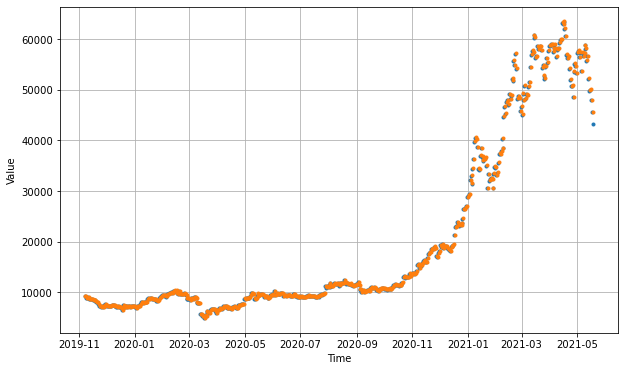

In [279]:
rnn_forecast = model_forecast(model_15, prices[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid,format='.')
plot_series(time_valid, rnn_forecast,format='.')

# Time series multivariate

In [281]:
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [293]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [321]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = float(block_reward_2)
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = float(block_reward_3)
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = float(block_reward_4)
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25.0
2013-10-02,125.45500,25.0
2013-10-03,108.58483,25.0
2013-10-04,118.67466,25.0
2013-10-05,121.33866,25.0


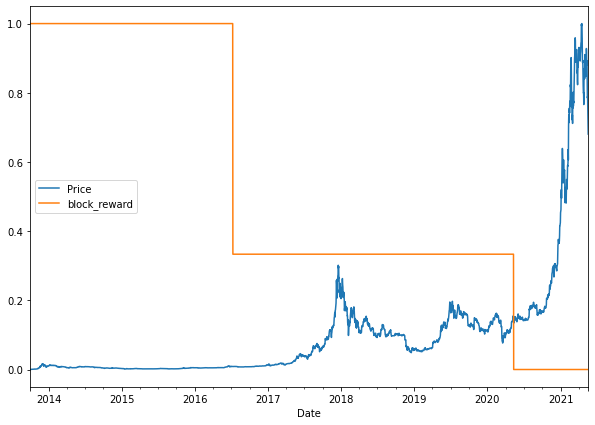

In [298]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

In [322]:
bitcoin_prices_block.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         2787 non-null   float64
 1   block_reward  2787 non-null   object 
dtypes: float64(1), object(1)
memory usage: 129.9+ KB


In [333]:
bitcoin_prices_block['block_reward']=bitcoin_prices_block['block_reward'].astype('float32')

In [336]:
split_time = int(0.8 * len(dates))
time_train = dates[:split_time]
x_train = bitcoin_prices_block[:split_time].values
time_valid = dates[split_time:]
x_valid = bitcoin_prices_block[split_time:].values
shuffle_buffer_size = 1000

In [337]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
test_set=windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model_16 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128,activation="relu"),
  tf.keras.layers.Dense(1,activation="linear"),
],name='model_16')

optimizer = tf.keras.optimizers.Adam()
model_16.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model_16.fit(train_set, epochs=100,validation_data=test_set,
            callbacks=[create_checkpoint_callback(model_name=model_16.name)])

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 2, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 2, 1), dtype=tf.float64, name=None))>
(2229, 2)
Epoch 1/100
9/9 [==============================] - 1s 73ms/step - loss: 1437.1310 - mae: 1437.6310 - val_loss: 8074.2671 - val_mae: 8074.7671
Epoch 2/100
9/9 [==============================] - 1s 57ms/step - loss: 1263.8793 - mae: 1264.3793 - val_loss: 7037.3359 - val_mae: 7037.8359
Epoch 3/100
9/9 [==============================] - 1s 56ms/step - loss: 1086.6741 - mae: 1087.1741 - val_loss: 6007.3779 - val_mae: 6007.8779
Epoch 4/100
9/9 [==============================] - 1s 58ms/step - loss: 912.8528 - mae: 913.3528 - val_loss: 4948.2935 - val_mae: 4948.7935
Epoch 5/100
9/9 [==============================] - 1s 62ms/step - loss: 732.2490 - mae: 732.7490 - val_loss: 3861.5449 - val_mae: 3862.0449
Epoch 6/100
9/9 [==============================] - 1s 61ms/step - loss: 544.9204 - mae: 545.4204 - val_loss: 2719.9814

9/9 [==============================] - 1s 54ms/step - loss: 52.3937 - mae: 52.6527 - val_loss: 260.6330 - val_mae: 260.8936
Epoch 60/100
9/9 [==============================] - 1s 54ms/step - loss: 52.3555 - mae: 52.6110 - val_loss: 261.6377 - val_mae: 261.9080
Epoch 61/100
9/9 [==============================] - 1s 54ms/step - loss: 52.3611 - mae: 52.6188 - val_loss: 260.6670 - val_mae: 260.9294
Epoch 62/100
9/9 [==============================] - 1s 55ms/step - loss: 52.3623 - mae: 52.6182 - val_loss: 261.7531 - val_mae: 262.0251
Epoch 63/100
9/9 [==============================] - 1s 58ms/step - loss: 52.3946 - mae: 52.6537 - val_loss: 260.6533 - val_mae: 260.9162
Epoch 64/100
9/9 [==============================] - 1s 55ms/step - loss: 52.3487 - mae: 52.6043 - val_loss: 261.4446 - val_mae: 261.7154
Epoch 65/100
9/9 [==============================] - 1s 54ms/step - loss: 52.3684 - mae: 52.6245 - val_loss: 260.7948 - val_mae: 261.0606
Epoch 66/100
9/9 [==============================] - 1s

In [348]:
class LearningRateReducerCb(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs={}):
    old_lr = self.model.optimizer.lr.read_value()
    new_lr = old_lr * 0.99
    print("\nEpoch: {}. Reducing Learning Rate from {} to {}".format(epoch, old_lr, new_lr))
    self.model.optimizer.lr.assign(new_lr)

In [349]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
test_set=windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model_15 = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu"),
  tf.keras.layers.Dense(1),
],name='model_15')
#lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.Adam()
model_15.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model_15.fit(train_set, epochs=100,validation_data=test_set,
            callbacks=[create_checkpoint_callback(model_name=model_15.name),LearningRateReducerCb()])

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 2, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 2, 1), dtype=tf.float64, name=None))>
(2229, 2)
Epoch 1/100
      8/Unknown - 2s 37ms/step - loss: 1397.7426 - mae: 1398.2426
Epoch: 0. Reducing Learning Rate from 0.0010000000474974513 to 0.0009900000877678394
9/9 [==============================] - 2s 69ms/step - loss: 1444.0438 - mae: 1444.5438 - val_loss: 8069.7222 - val_mae: 8070.2124
Epoch 2/100
7/9 [======================>.......] - ETA: 0s - loss: 1244.1536 - mae: 1244.6530
Epoch: 1. Reducing Learning Rate from 0.0009900000877678394 to 0.000980100128799677
9/9 [==============================] - 1s 54ms/step - loss: 1318.2025 - mae: 1318.7019 - val_loss: 7599.1523 - val_mae: 7599.6523
Epoch 3/100
7/9 [======================>.......] - ETA: 0s - loss: 1109.3829 - mae: 1109.8800
Epoch: 2. Reducing Learning Rate from 0.000980100128799677 to 0.0009702991228550673
9/9 [==============================] - 1s 51m

Epoch 28/100
7/9 [======================>.......] - ETA: 0s - loss: 50.6971 - mae: 51.1402
Epoch: 27. Reducing Learning Rate from 0.0007623429992236197 to 0.0007547196000814438
9/9 [==============================] - 1s 52ms/step - loss: 54.0719 - mae: 54.5229 - val_loss: 279.4163 - val_mae: 279.9163
Epoch 29/100
7/9 [======================>.......] - ETA: 0s - loss: 55.5981 - mae: 56.0604
Epoch: 28. Reducing Learning Rate from 0.0007547196000814438 to 0.0007471723947674036
9/9 [==============================] - 1s 53ms/step - loss: 58.2696 - mae: 58.7339 - val_loss: 296.0476 - val_mae: 296.5473
Epoch 30/100
7/9 [======================>.......] - ETA: 0s - loss: 56.0578 - mae: 56.5517
Epoch: 29. Reducing Learning Rate from 0.0007471723947674036 to 0.0007397006847895682
9/9 [==============================] - 1s 50ms/step - loss: 59.9004 - mae: 60.3917 - val_loss: 291.0426 - val_mae: 291.5423
Epoch 31/100
8/9 [=========================>....] - ETA: 0s - loss: 58.6676 - mae: 59.1462
Epoch:

7/9 [======================>.......] - ETA: 0s - loss: 49.8667 - mae: 50.3168
Epoch: 54. Reducing Learning Rate from 0.0005811668233945966 to 0.0005753551376983523
9/9 [==============================] - 1s 52ms/step - loss: 54.0665 - mae: 54.5191 - val_loss: 265.0811 - val_mae: 265.5802
Epoch 56/100
7/9 [======================>.......] - ETA: 0s - loss: 49.4222 - mae: 49.8255
Epoch: 55. Reducing Learning Rate from 0.0005753551376983523 to 0.0005696016014553607
9/9 [==============================] - 1s 55ms/step - loss: 53.0313 - mae: 53.4375 - val_loss: 267.4843 - val_mae: 267.9835
Epoch 57/100
7/9 [======================>.......] - ETA: 0s - loss: 48.1492 - mae: 48.5589
Epoch: 56. Reducing Learning Rate from 0.0005696016014553607 to 0.0005639055743813515
9/9 [==============================] - 1s 49ms/step - loss: 53.1702 - mae: 53.5874 - val_loss: 269.3392 - val_mae: 269.8390
Epoch 58/100
7/9 [======================>.......] - ETA: 0s - loss: 51.1232 - mae: 51.5479
Epoch: 57. Reducing

9/9 [==============================] - ETA: 0s - loss: 53.0778 - mae: 53.4988
Epoch: 81. Reducing Learning Rate from 0.0004430483386386186 to 0.00043861786252819
9/9 [==============================] - 1s 56ms/step - loss: 53.0778 - mae: 53.4988 - val_loss: 266.9262 - val_mae: 267.4259
Epoch 83/100
8/9 [=========================>....] - ETA: 0s - loss: 52.3596 - mae: 52.7566
Epoch: 82. Reducing Learning Rate from 0.00043861786252819 to 0.0004342316824477166
9/9 [==============================] - 1s 55ms/step - loss: 52.9920 - mae: 53.3891 - val_loss: 267.8330 - val_mae: 268.3325
Epoch 84/100
7/9 [======================>.......] - ETA: 0s - loss: 48.8508 - mae: 49.2519
Epoch: 83. Reducing Learning Rate from 0.0004342316824477166 to 0.00042988936183974147
9/9 [==============================] - 1s 49ms/step - loss: 52.8614 - mae: 53.2589 - val_loss: 263.9026 - val_mae: 264.4017
Epoch 85/100
7/9 [======================>.......] - ETA: 0s - loss: 47.8291 - mae: 48.1924
Epoch: 84. Reducing Le

In [379]:
arr=bitcoin_prices_block.values
rnn_forecast = model_forecast(model_15, arr[...,np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

<tf.Tensor: shape=(558,), dtype=float32, numpy=
array([ 9353.096 ,  9243.637 ,  8810.743 ,  8814.434 ,  9098.08  ,
        8727.773 ,  8777.219 ,  8765.826 ,  8673.111 ,  8516.509 ,
        8485.07  ,  8553.27  ,  8221.149 ,  8133.6772,  8089.9546,
        7627.033 ,  7275.782 ,  7317.1504,  7055.0137,  7225.4443,
        7154.527 ,  7537.6147,  7404.1064,  7743.765 ,  7556.4033,
        7395.8467,  7347.231 ,  7329.134 ,  7227.3193,  7412.701 ,
        7525.994 ,  7546.2734,  7564.422 ,  7346.8936,  7253.3945,
        7211.625 ,  7203.8164,  7252.505 ,  7100.386 ,  7126.1387,
        6896.4976,  6596.5   ,  7437.974 ,  7161.037 ,  7153.3887,
        7300.0493,  7250.6133,  7179.6743,  7249.251 ,  7226.394 ,
        7197.2393,  7240.904 ,  7325.3193,  7399.355 ,  7264.9297,
        7193.4844,  7188.2607,  6968.616 ,  7304.943 ,  7351.4424,
        7361.2563,  7728.332 ,  8054.652 ,  8082.704 ,  7823.3403,
        8102.587 ,  8094.112 ,  8164.5566,  8132.1465,  8751.423 ,
        8860.1

In [378]:
rnn_forecast.shape

(558, 1)

In [380]:
testprep=pd.DataFrame(x_valid)
testprep['predict_prices']=tf.squeeze(rnn_forecast)
testprep

,0,1,predict_prices
0,9226.485821,12.50,9353.095703
1,8794.358645,12.50,9243.636719
2,8798.042055,12.50,8810.743164
3,9081.186878,12.50,8814.433594
4,8711.534339,12.50,9098.080078
...,...,...,...
553,49764.132082,6.25,52240.988281
554,50032.693137,6.25,49853.074219
555,47885.625255,6.25,50122.113281
556,45604.615754,6.25,47971.242188


In [387]:
arr=bitcoin_prices_block.values
rnn_forecast = model_forecast(model_15, arr[...,np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1,1]
testprep['predict_block']=tf.squeeze(rnn_forecast)
testprep

,0,1,predict_prices,predict_block
0,9226.485821,12.50,9353.095703,13.158683
1,8794.358645,12.50,9243.636719,13.148200
2,8798.042055,12.50,8810.743164,13.106910
3,9081.186878,12.50,8814.433594,13.107306
4,8711.534339,12.50,9098.080078,13.134376
...,...,...,...,...
553,49764.132082,6.25,52240.988281,11.616767
554,50032.693137,6.25,49853.074219,11.389594
555,47885.625255,6.25,50122.113281,11.415107
556,45604.615754,6.25,47971.242188,11.209907


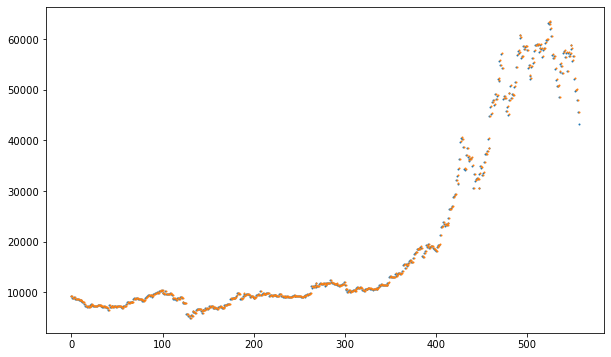

In [397]:
plt.figure(figsize=(10, 6))
plt.scatter([i for i in range(558)],testprep[0],s=1)
plt.scatter([i for i in range(558)],testprep['predict_prices'],s=1)